# TVVL Cursus | Intro Python | Deel 3
Middels het gebruik van een aantal losse .csv bestanden worden een aantal basisfunctionaliteiten van de Python Libary Pandas rondom Iime Series data toegelicht.

## Python Libary Imports
We beginnen met het importeren van de benodigde Python Libaries. Voor deze intro hebben we de Pandas, Matplotlib en Seaborn libary nodig.

In [1]:
# Importeren Pandas Libary
import pandas as pd

## Lees data uit CSV bestanden
Het csv bestand "energie_data.csv" wordt ingelezen. Vervolgens bekijken we de dataset met de "head()" functie. Hieruit blijkt dat data betrekking heeft op vier metingen: Gas, Electricity, District Cooling, District Heating.

In [2]:
# Lees CSV bestand met "," als seperator voor elke kolom
energie_data = pd.read_csv("energie_data.csv",sep=",")
energie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133884 entries, 0 to 133883
Data columns (total 11 columns):
timestamp                     133884 non-null int64
dutch_hour                    133884 non-null int64
day                           133884 non-null int64
weekday                       133884 non-null object
month                         133884 non-null int64
month_name                    133884 non-null object
year                          133884 non-null int64
energy_consumption            66942 non-null float64
primary_energy_consumption    66942 non-null float64
energy_unit                   133884 non-null object
energy_type                   133884 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 11.2+ MB


Doordat voor elke timestamp de vier data variable onder elkaar staan, is de indeling niet ideaal om te analyseren. Gewenst is dat elke energiemeting een eigen kolom bevat. Om dit te realiseren gaan we eerst voor elke energiemeting de dataset filteren.

In [3]:
# Filter dataset alleen op kolom "energy_type" met de waarde "Gas"
gas_data = energie_data[energie_data["energy_type"]=="Gas"]
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33471 entries, 0 to 133883
Data columns (total 11 columns):
timestamp                     33471 non-null int64
dutch_hour                    33471 non-null int64
day                           33471 non-null int64
weekday                       33471 non-null object
month                         33471 non-null int64
month_name                    33471 non-null object
year                          33471 non-null int64
energy_consumption            33471 non-null float64
primary_energy_consumption    33471 non-null float64
energy_unit                   33471 non-null object
energy_type                   33471 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 3.1+ MB


In [4]:
# Filter dataset alleen op kolom "energy_type" met de waarde "Electricity"
elektra_data = energie_data[energie_data["energy_type"]== "Electricity"]
elektra_data.head()

,timestamp,dutch_hour,day,weekday,month,month_name,year,energy_consumption,primary_energy_consumption,energy_unit,energy_type
1,1562446800,23,6,Saturday,7,July,2019,35.406376,88.51594,Kwh,Electricity
4,1562443200,22,6,Saturday,7,July,2019,48.729352,121.82338,Kwh,Electricity
11,1562439600,21,6,Saturday,7,July,2019,49.831496,124.57874,Kwh,Electricity
12,1562436000,20,6,Saturday,7,July,2019,47.092344,117.73086,Kwh,Electricity
19,1562432400,19,6,Saturday,7,July,2019,44.644936,111.61234,Kwh,Electricity


In [5]:
# Filter dataset alleen op kolom "energy_type" met de waarde "District Cooling"
cooling_data = energie_data[energie_data["energy_type"]== "District Cooling"]
cooling_data.head()

,timestamp,dutch_hour,day,weekday,month,month_name,year,energy_consumption,primary_energy_consumption,energy_unit,energy_type
2,1562446800,23,6,Saturday,7,July,2019,NaN,NaN,GJ,District Cooling
5,1562443200,22,6,Saturday,7,July,2019,NaN,NaN,GJ,District Cooling
8,1562439600,21,6,Saturday,7,July,2019,NaN,NaN,GJ,District Cooling
15,1562436000,20,6,Saturday,7,July,2019,NaN,NaN,GJ,District Cooling
17,1562432400,19,6,Saturday,7,July,2019,NaN,NaN,GJ,District Cooling


In [6]:
# Filter dataset alleen op kolom "energy_type" met de waarde "District Heating"
heating_data = energie_data[energie_data["energy_type"]== "District Heating"]
heating_data.head()

,timestamp,dutch_hour,day,weekday,month,month_name,year,energy_consumption,primary_energy_consumption,energy_unit,energy_type
3,1562446800,23,6,Saturday,7,July,2019,NaN,NaN,GJ,District Heating
7,1562443200,22,6,Saturday,7,July,2019,NaN,NaN,GJ,District Heating
10,1562439600,21,6,Saturday,7,July,2019,NaN,NaN,GJ,District Heating
13,1562436000,20,6,Saturday,7,July,2019,NaN,NaN,GJ,District Heating
16,1562432400,19,6,Saturday,7,July,2019,NaN,NaN,GJ,District Heating


## Eerste check data qualiteit
Vanuit het bekijken van de data middels de 'head()' functie kon worden opgemerkt dat er voor 'District Heating' en 'District Cooling' veelal 'NaN' waardes aanwezig zijn. Daarnaast is het voor de "Gas" en "Electricity" kolom belangrijk om de compleetheid te controlleren.

In [7]:
heating_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33471 entries, 3 to 133881
Data columns (total 11 columns):
timestamp                     33471 non-null int64
dutch_hour                    33471 non-null int64
day                           33471 non-null int64
weekday                       33471 non-null object
month                         33471 non-null int64
month_name                    33471 non-null object
year                          33471 non-null int64
energy_consumption            0 non-null float64
primary_energy_consumption    0 non-null float64
energy_unit                   33471 non-null object
energy_type                   33471 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 3.1+ MB


In [8]:
cooling_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33471 entries, 2 to 133880
Data columns (total 11 columns):
timestamp                     33471 non-null int64
dutch_hour                    33471 non-null int64
day                           33471 non-null int64
weekday                       33471 non-null object
month                         33471 non-null int64
month_name                    33471 non-null object
year                          33471 non-null int64
energy_consumption            0 non-null float64
primary_energy_consumption    0 non-null float64
energy_unit                   33471 non-null object
energy_type                   33471 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 3.1+ MB


In [9]:
elektra_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33471 entries, 1 to 133882
Data columns (total 11 columns):
timestamp                     33471 non-null int64
dutch_hour                    33471 non-null int64
day                           33471 non-null int64
weekday                       33471 non-null object
month                         33471 non-null int64
month_name                    33471 non-null object
year                          33471 non-null int64
energy_consumption            33471 non-null float64
primary_energy_consumption    33471 non-null float64
energy_unit                   33471 non-null object
energy_type                   33471 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 3.1+ MB


In [10]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33471 entries, 0 to 133883
Data columns (total 11 columns):
timestamp                     33471 non-null int64
dutch_hour                    33471 non-null int64
day                           33471 non-null int64
weekday                       33471 non-null object
month                         33471 non-null int64
month_name                    33471 non-null object
year                          33471 non-null int64
energy_consumption            33471 non-null float64
primary_energy_consumption    33471 non-null float64
energy_unit                   33471 non-null object
energy_type                   33471 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 3.1+ MB


In totaal heeft de dataset 33471 rijen. Vervolgens controleren we per variable hoeveel missende waardes deze bevat.

In [11]:
heating_data.isnull().sum()

timestamp                         0
dutch_hour                        0
day                               0
weekday                           0
month                             0
month_name                        0
year                              0
energy_consumption            33471
primary_energy_consumption    33471
energy_unit                       0
energy_type                       0
dtype: int64

In [12]:
cooling_data.isnull().sum()

timestamp                         0
dutch_hour                        0
day                               0
weekday                           0
month                             0
month_name                        0
year                              0
energy_consumption            33471
primary_energy_consumption    33471
energy_unit                       0
energy_type                       0
dtype: int64

In [13]:
elektra_data.isnull().sum()

timestamp                     0
dutch_hour                    0
day                           0
weekday                       0
month                         0
month_name                    0
year                          0
energy_consumption            0
primary_energy_consumption    0
energy_unit                   0
energy_type                   0
dtype: int64

In [14]:
gas_data.isnull().sum()

timestamp                     0
dutch_hour                    0
day                           0
weekday                       0
month                         0
month_name                    0
year                          0
energy_consumption            0
primary_energy_consumption    0
energy_unit                   0
energy_type                   0
dtype: int64

Bij "District Cooling" en "District Heating" bevat 33471 rijen geen data. Kortom: "District Cooling" en "District Heating" kunnen buiten beschouwing worden gelaten.

# Data bewerking
Om de dataset te analyseren willen we gebruik maken van de data in de "energy_consumption" kolom voor elektra en gas. Om te komen tot een goed te analyseren matrix dienen we een aantal bewerkingen uit te voeren om dit te verkrijgen.

## Creeer time series index
Om volledig gebruik te maken van de mogelijkheden van Pandas is het noodzakelijk dat een dataset wordt gecreeerd die een index bevat die de datum en tijd vertegenwoordigd. Binnen Pandas staat dit bekend als DatetimeIndex: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html.

Vanuit de kolommen "year", "month", "day" en "dutch_hour" kunnen we 1 kolom samenstellen die de datum in vertegenwoordig in het format "jaar maand dag uur". Echter om een tot een 'datetime64' datatype te komen, is het nodig om data voor minuten en seconde te hebben. Dit wordt gerealiseerd door twee keer een 0 erbij te zetten.

In [15]:
time = pd.DataFrame(heating_data["year"].astype(str) + " " + heating_data["month"].astype(str) + 
                    " " + heating_data["day"].astype(str) + " " + 
                    heating_data["dutch_hour"].astype(str) + " " + str(0) + " " + str(0)).rename(columns={0: "timestamp"})
time.head()

,timestamp
3,2019 7 6 23 0 0
7,2019 7 6 22 0 0
10,2019 7 6 21 0 0
13,2019 7 6 20 0 0
16,2019 7 6 19 0 0


Vervolgens kunnen we met de "to_datetime()" functie de "time[timestamp]" kolom omzetten naar een "datetime64" datatype. Dit datatype is nodig om uiteindelijk de kolom in te stellen als een "DatetimeIndex". In de functie moet je het format aangeven hoe de indeling van de timestamp is. In dit geval is het jaar (Y), maand (m), dag (d), uur (H), minute (M) en seconde (S). 

In [16]:
time = pd.DataFrame(pd.to_datetime(time["timestamp"], format='%Y %m %d %H %M %S'))
time.head()

,timestamp
3,2019-07-06 23:00:00
7,2019-07-06 22:00:00
10,2019-07-06 21:00:00
13,2019-07-06 20:00:00
16,2019-07-06 19:00:00


## Creeer nieuwe DataFrame
Nu de timestamp kolom van het goede datatype is kunnen we een DataFrame creëren die uiteindelijk geschikt is om te gebruiken voor het analyseren van de data. Voordat we de gewenste kolommen kunnen samenvoegen moeten de indexen gelijk zijn aan elkaar. Middels de 'reset_index()' functie wordt een nieuwe index telling gecreëerd.

In [17]:
gas_data = gas_data.reset_index()
elektra_data = elektra_data.reset_index()
time = time.reset_index()

Als we een kijkje nemen naar bijvoorbeeld de inhoud van de "time" DataFrame zien we dat de oude index nu in de kolom "index" is geplaats. Bij de nieuwe index is de telling opnieuw begonnen vanaf 0.

In [18]:
time.head()

,index,timestamp
0,3,2019-07-06 23:00:00
1,7,2019-07-06 22:00:00
2,10,2019-07-06 21:00:00
3,13,2019-07-06 20:00:00
4,16,2019-07-06 19:00:00


Vervolgens voegen we alle variabelen samen in een nieuw DataFrame die we 'energy_dataframe' noemen

In [19]:
energy_dataframe = pd.DataFrame({
    
    'timestamp': time["timestamp"],
    'gas_consumption [m3]': gas_data["energy_consumption"],
    'elek_consumption [kWh]': elektra_data["energy_consumption"]
})

In [20]:
energy_dataframe.head()

,elek_consumption [kWh],gas_consumption [m3],timestamp
0,35.406376,0.0,2019-07-06 23:00:00
1,48.729352,0.0,2019-07-06 22:00:00
2,49.831496,0.0,2019-07-06 21:00:00
3,47.092344,0.0,2019-07-06 20:00:00
4,44.644936,0.0,2019-07-06 19:00:00


Nu hebben we bijna een matrix geschikt om te gaan analyseren. De laatste twee bewerkingen die we moeten uitvoeren zijn:

- Sorteren van kolommen laag naar hoog in relatie tot de "timestamp" (dus van 2015 naar 2018 i.p.v. 2018 naar 2015). Dit doen we met de functie 'sort_values()';
- Het instellen van de "timestamp" kolom als index. Dit doen we middels de 'set_index()' function.

In [21]:
# Kolomen sorteren door "timestamp" waarde van laag naar hoog in te stellen
energy_dataframe = energy_dataframe.sort_values(by=["timestamp"])
# Vervolgens "timestamp" kolom instellen als DataFrame index
energy_dataframe = energy_dataframe.set_index(energy_dataframe["timestamp"])
# Vervolgens "timestamp" kolom verwijderen
energy_dataframe = energy_dataframe.drop(["timestamp"],axis=1)
# Bekijk het resultaat
energy_dataframe.head()

,elek_consumption [kWh],gas_consumption [m3]
timestamp,,
2015-09-03 11:00:00,32.61860,0.712500
2015-09-03 12:00:00,129.98816,4.747500
2015-09-03 13:00:00,128.44840,3.572500
2015-09-03 14:00:00,126.38188,2.579167
2015-09-03 15:00:00,128.73204,3.077500


## Selecteren van time ranges
Nu we een "datetime64" datatype hebben ingesteld als index kunnen we een aantal krachtige functionaliteiten gebruiken die  simpel zijn uit te voeren. Via de 'info()' functionaliteit is te zien dat de timerange vanaf september 2015 tot juli 2019 loopt.

In [22]:
energy_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33471 entries, 2015-09-03 11:00:00 to 2019-07-06 23:00:00
Data columns (total 2 columns):
elek_consumption [kWh]    33471 non-null float64
gas_consumption [m3]      33471 non-null float64
dtypes: float64(2)
memory usage: 784.5 KB


Om de data per jaar te bekijken kan er bijvoorbeeld '2017' worden ingevuld. Qua selectie kan dit verder worden gedetailleerd tot het niveau van een dag. Zo kan je bijvoorbeeld '2015-09-03' invoeren om de data voor die specifieke dag te selecteren.

In [23]:
energy_dataframe["2015-09-03"]

,elek_consumption [kWh],gas_consumption [m3]
timestamp,,
2015-09-03 11:00:00,32.61860,0.712500
2015-09-03 12:00:00,129.98816,4.747500
2015-09-03 13:00:00,128.44840,3.572500
2015-09-03 14:00:00,126.38188,2.579167
2015-09-03 15:00:00,128.73204,3.077500
2015-09-03 16:00:00,127.19228,3.771667
2015-09-03 17:00:00,124.47744,1.804167
2015-09-03 18:00:00,116.25188,3.279167
2015-09-03 19:00:00,110.53856,5.089167


Om tot op uur-/minute- of secondeniveau te kunnen selecteren, kan gebruik gemaakt worden van de 'loc[]' functie. Zo kan op een dieper detail een selectie van een datapunt of timerange worden uitgevoerd. 

In [24]:
# energy_dataframe["2016-6-1":"2017-6-10"]
energy_dataframe.loc["2016-6-1 23":"2016-9-1 15"]

,elek_consumption [kWh],gas_consumption [m3]
timestamp,,
2016-06-01 23:00:00,47.473232,0.000000
2016-06-02 00:00:00,32.691536,0.000000
2016-06-02 01:00:00,32.274180,0.000000
2016-06-02 02:00:00,31.868980,0.000000
2016-06-02 03:00:00,31.958124,0.000000
2016-06-02 04:00:00,31.589392,0.000000
2016-06-02 05:00:00,31.273336,0.000000
2016-06-02 06:00:00,59.187564,3.666667
2016-06-02 07:00:00,111.563716,1.222500


Een andere krachtige functie voor timeseries analayse is "resample()". Hierbij kan je eenvoudig o.a. optellingen of gemiddeldes uitrekenen over bepaalde periodes in een datasets. Veel gebruikte afkortingen voor periode's die gebruikt kunnen worden zijn:

- B = Werkdag
- D = Dag
- W = Week  
- M = Maand
- Q = Kwartaal
- A = Jaar

In de onderstaande regel creëren we een barplot voor het verbruik elk jaar.

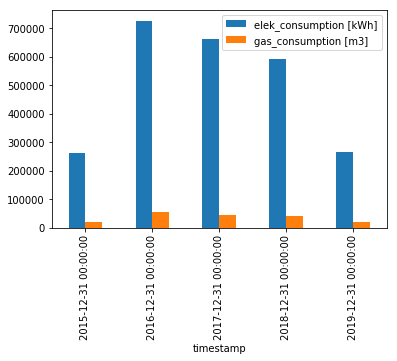

In [26]:
energy_dataframe.resample('A').sum().plot.bar()

In de onderstaande regel creëren we een barplot voor het jaar 2017 per kwartaal, voor de data in kolom "elek_consumption [kWh]".

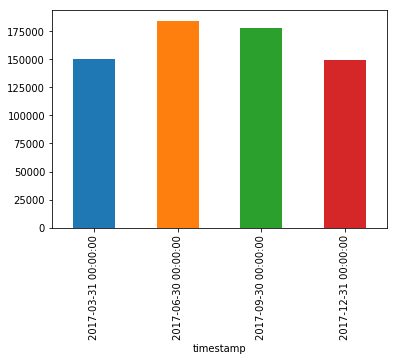

In [28]:
energy_dataframe["2017"]["elek_consumption [kWh]"].resample('Q').sum().plot.bar()

# Time series analyse & resultaten

Nu we de gewenste dataset hebben, kunnen we gaan analyseren. Hierbij gaan we een aantal grafieken maken. De hierboven gemaakte grafieken komen vanuit de "matplotlib" libary. Wanneer we gebruik willen maken van de seaborn libary, dienen we eerst aan te geven dat "pandas" voortaan seabron moet aanroepen.

In [29]:
import seaborn; seaborn.set()

Vervolgens kunnen we dezelfde code voor een kwartaalplot gebruiken. Echter is de opmaakt van de afbeelding anders doordat nu gebruik wordt gemaakt van de seabron libary.

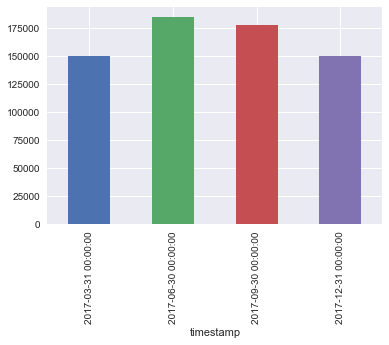

In [30]:
energy_dataframe["2017"]["elek_consumption [kWh]"].resample('Q').sum().plot.bar()

## Analyse per verschillende tijdsperioden middels 'groupby'
Vanuit de dataset die we nu hebben halen we eerst een aantal statestieken naar voren middels de 'describe()' functie.

In [31]:
energy_dataframe.head()

,elek_consumption [kWh],gas_consumption [m3]
timestamp,,
2015-09-03 11:00:00,32.61860,0.712500
2015-09-03 12:00:00,129.98816,4.747500
2015-09-03 13:00:00,128.44840,3.572500
2015-09-03 14:00:00,126.38188,2.579167
2015-09-03 15:00:00,128.73204,3.077500


Vervolgens kijken we naar de opgetelde verbuiken per kwartaal voor elk jaar en visualiseren deze in een barplot. Hiervoor maken we gebruik van de "groupby()" functie waar we middels "index.year" en "index.quarter" een onderverdeling kunnen maken. Andere index labels zijn:

- index.dayofweek
- index.weekday
- weekday_name

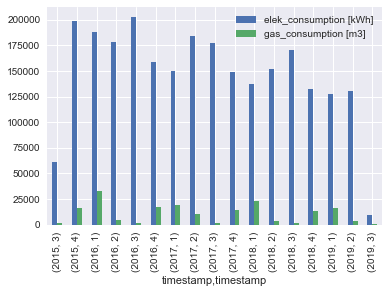

In [32]:
energy_dataframe.groupby([energy_dataframe.index.year,energy_dataframe.index.quarter]).sum().plot.bar()

Vervolgens kijken we naar de opgetelde verbruiken per maand voor elk jaar. Hiervoor gebruiken we in plaats van "index.quarter" nu "index.month".

In [34]:
energy_dataframe.groupby([energy_dataframe.index.year,energy_dataframe.index.month]).sum()

elek_consumption [kWh]  gas_consumption [m3]
timestamp timestamp                                              
2015      9                    61487.843880           1939.700000
          10                   68496.345160           4466.291667
          11                   65640.414520           5546.981667
          12                   65108.386920           6296.726667
2016      1                    64644.311360          12297.170000
          2                    60947.870308          11058.735000
          3                    62429.082960           9773.314167
          4                    55266.873112           3450.629167
          5                    60319.392952            905.965000
          6                    62550.193188            440.789999
          7                    70564.806068            371.824167
          8                    67731.728708            621.385833
          9                    64035.700960            357.146666
          10                   54882.054672           3440.527500
          11                   52102.751404           6811.483333
          12                   51584.472240           7134.272500
2017      1                    52080.449196           9857.667500
          2                    44327.741388           5425.490000
          3                    53448.825804           3437.790000
          4                    52887.627856           6775.365833
          5                    65398.169752           2708.130833
          6                    66209.777248            439.819999
          7                    63683.979256            264.853333
          8                    60537.054236            293.525000
          9                    53267.960732           1040.227500
          10                   53000.808320           1543.042495
          11                   48972.808316           5111.288332
          12                   47289.121276           7906.818332
2018      1                    48463.536748           6632.280831
          2                    44381.551948           9372.011665
          3                    44907.704148           6611.544162
          4                    45449.083764           1956.057490
          5                    53475.009828            740.824987
          6                    53169.776720            418.399156
          7                    62251.090756             61.670823
          8                    59595.867832            341.659992
          9                    48983.315152            895.569984
          10                   48669.860536           2063.349986
          11                   44469.593804           4732.549998
          12                   39428.792348           5921.209167
2019      1                    41486.288544           7342.474167
          2                    41491.430532           4461.394167
          3                    45014.482452           4057.080000
          4                    42300.120588           1964.648333
          5                    42755.464088           1381.960000
          6                    45272.570540            141.516251
          7                     8933.144552             16.870000

Vervolgens kijken we naar de gemiddelde verbuiken per dag voor elk jaar. Hiervoor gebruiken we in plaats van "index.month" nu "index.weekday". Deze geeft de weekdagen met maandag = 0, zondag = 6.

In [35]:
grouped_data = energy_dataframe.groupby([energy_dataframe.index.year,energy_dataframe.index.weekday_name]).mean()
grouped_data

elek_consumption [kWh]  gas_consumption [m3]
timestamp timestamp                                              
2015      Friday                  95.069951              6.113275
          Monday                  98.300428              6.974308
          Saturday                77.875567              6.317040
          Sunday                  71.378463              6.297220
          Thursday                98.369855              6.209188
          Tuesday                 98.343530              6.593830
          Wednesday               96.579321              6.026955
2016      Friday                  88.699564              6.778342
          Monday                  89.867115              6.440342
          Saturday                69.564054              6.674901
          Sunday                  60.982633              6.163869
          Thursday                91.492455              6.554185
          Tuesday                 91.673534              6.318163
          Wednesday               90.169182              6.454539
2017      Friday                  80.876342              5.314641
          Monday                  82.011520              4.942810
          Saturday                61.259048              5.462262
          Sunday                  56.778282              5.519835
          Thursday                82.746673              4.832117
          Tuesday                 83.653290              5.031550
          Wednesday               82.885046              4.784678
2018      Friday                  74.738530              4.764277
          Monday                  76.086837              4.660835
          Saturday                47.555467              4.689939
          Sunday                  43.451468              4.225781
          Thursday                77.551439              4.404345
          Tuesday                 79.796945              4.593931
          Wednesday               76.149882              4.509205
2019      Friday                  67.811480              4.397708
          Monday                  67.753025              4.935363
          Saturday                42.413388              3.413562
          Sunday                  39.883082              3.974646
          Thursday                69.209636              4.578927
          Tuesday                 68.899758              4.708461
          Wednesday               68.459280              4.788102

In [36]:
grouped_data.index.get_level_values(0)

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016,
            2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2018,
            2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019,
            2019, 2019],
           dtype='int64', name='timestamp')

In [37]:
grouped_data.loc[2015]

,elek_consumption [kWh],gas_consumption [m3]
timestamp,,
Friday,95.069951,6.113275
Monday,98.300428,6.974308
Saturday,77.875567,6.317040
Sunday,71.378463,6.297220
Thursday,98.369855,6.209188
Tuesday,98.343530,6.593830
Wednesday,96.579321,6.026955


In [38]:
grouped_data.loc[(2016, 'Tuesday'):(2016, 'Wednesday')]

elek_consumption [kWh]  gas_consumption [m3]
timestamp timestamp                                              
2016      Tuesday                 91.673534              6.318163
          Wednesday               90.169182              6.454539

## Pivottables

Middels 'pd.pivot_table()' functie kunnen we matrices transformeren om voor bepaalde periode's een gemiddelde of optelling te creëren. Onderstaand berekenen we het gemiddeld gebruik per weekdag voor elk jaar.

In [39]:
energy_per_dag = pd.pivot_table(energy_dataframe, index=energy_dataframe.index.weekday, columns=energy_dataframe.index.year,
                    aggfunc='mean')
energy_per_dag

elek_consumption [kWh]                                              \
timestamp                   2015       2016       2017       2018       2019   
timestamp                                                                      
0                      98.300428  89.867115  82.011520  76.086837  67.753025   
1                      98.343530  91.673534  83.653290  79.796945  68.899758   
2                      96.579321  90.169182  82.885046  76.149882  68.459280   
3                      98.369855  91.492455  82.746673  77.551439  69.209636   
4                      95.069951  88.699564  80.876342  74.738530  67.811480   
5                      77.875567  69.564054  61.259048  47.555467  42.413388   
6                      71.378463  60.982633  56.778282  43.451468  39.883082   

          gas_consumption [m3]                                          
timestamp                 2015      2016      2017      2018      2019  
timestamp                                                               
0                     6.974308  6.440342  4.942810  4.660835  4.935363  
1                     6.593830  6.318163  5.031550  4.593931  4.708461  
2                     6.026955  6.454539  4.784678  4.509205  4.788102  
3                     6.209188  6.554185  4.832117  4.404345  4.578927  
4                     6.113275  6.778342  5.314641  4.764277  4.397708  
5                     6.317040  6.674901  5.462262  4.689939  3.413562  
6                     6.297220  6.163869  5.519835  4.225781  3.974646

Nu kunnen we het gemiddelde dagverbuik per week voor elk jaar plotten.

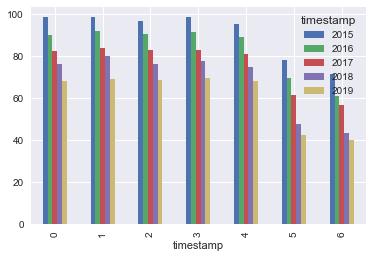

In [40]:
energy_per_dag["elek_consumption [kWh]"].plot.bar()

Om een optelling per maand te doen veranderen we twee invoer parameters:

- "index=energy_dataframe.index.weekday" wordt "index=energy_dataframe.index.month";
- aggfunc='mean' wordt aggfunc='sum'

In [41]:
energy_per_maand = pd.pivot_table(energy_dataframe, index=energy_dataframe.index.month, columns=energy_dataframe.index.year,
                    aggfunc='sum')
energy_per_maand

elek_consumption [kWh]                                            \
timestamp                   2015          2016          2017          2018   
timestamp                                                                    
1                            NaN  64644.311360  52080.449196  48463.536748   
2                            NaN  60947.870308  44327.741388  44381.551948   
3                            NaN  62429.082960  53448.825804  44907.704148   
4                            NaN  55266.873112  52887.627856  45449.083764   
5                            NaN  60319.392952  65398.169752  53475.009828   
6                            NaN  62550.193188  66209.777248  53169.776720   
7                            NaN  70564.806068  63683.979256  62251.090756   
8                            NaN  67731.728708  60537.054236  59595.867832   
9                    61487.84388  64035.700960  53267.960732  48983.315152   
10                   68496.34516  54882.054672  53000.808320  48669.860536   
11                   65640.41452  52102.751404  48972.808316  44469.593804   
12                   65108.38692  51584.472240  47289.121276  39428.792348   

                        gas_consumption [m3]                             \
timestamp          2019                 2015          2016         2017   
timestamp                                                                 
1          41486.288544                  NaN  12297.170000  9857.667500   
2          41491.430532                  NaN  11058.735000  5425.490000   
3          45014.482452                  NaN   9773.314167  3437.790000   
4          42300.120588                  NaN   3450.629167  6775.365833   
5          42755.464088                  NaN    905.965000  2708.130833   
6          45272.570540                  NaN    440.789999   439.819999   
7           8933.144552                  NaN    371.824167   264.853333   
8                   NaN                  NaN    621.385833   293.525000   
9                   NaN          1939.700000    357.146666  1040.227500   
10                  NaN          4466.291667   3440.527500  1543.042495   
11                  NaN          5546.981667   6811.483333  5111.288332   
12                  NaN          6296.726667   7134.272500  7906.818332   

                                     
timestamp         2018         2019  
timestamp                            
1          6632.280831  7342.474167  
2          9372.011665  4461.394167  
3          6611.544162  4057.080000  
4          1956.057490  1964.648333  
5           740.824987  1381.960000  
6           418.399156   141.516251  
7            61.670823    16.870000  
8           341.659992          NaN  
9           895.569984          NaN  
10         2063.349986          NaN  
11         4732.549998          NaN  
12         5921.209167          NaN

Om een optelling per jaar te doen veranderen we twee invoer parameters:

- "index=energy_dataframe.index.weekday" wordt "index=energy_dataframe.index.year";
- aggfunc='mean' wordt aggfunc='sum'.

In [42]:
energy_per_jaar = pd.pivot_table(energy_dataframe, index=energy_dataframe.index.year, columns=energy_dataframe.index.year,
                    aggfunc='sum')
energy_per_jaar

elek_consumption [kWh]                                              \
timestamp                   2015           2016          2017           2018   
timestamp                                                                      
2015                260732.99048            NaN           NaN            NaN   
2016                         NaN  727059.237932           NaN            NaN   
2017                         NaN            NaN  661104.32338            NaN   
2018                         NaN            NaN           NaN  593245.183584   
2019                         NaN            NaN           NaN            NaN   

                         gas_consumption [m3]                              \
timestamp           2019                 2015          2016          2017   
timestamp                                                                   
2015                 NaN              18249.7           NaN           NaN   
2016                 NaN                  NaN  56663.243332           NaN   
2017                 NaN                  NaN           NaN  44804.019158   
2018                 NaN                  NaN           NaN           NaN   
2019       267253.501296                  NaN           NaN           NaN   

                                      
timestamp         2018          2019  
timestamp                             
2015               NaN           NaN  
2016               NaN           NaN  
2017               NaN           NaN  
2018       39747.12824           NaN  
2019               NaN  19365.942918

## Subplots

Middels subplots kunnen we verschillende plots in een enkel overzicht krijgen. Onderstaand plotten we de volgende plots:

- Elektra gemiddeld vebruik per dag, voor elk jaar;
- Elektra maandelijks totaalverbruik per jaar;
- Elektra totaalverbruik per jaar.
- Gas gemiddeld vebruik per dag, voor elk jaar;
- Gas maandelijks totaalverbruik per jaar;
- Gas totaalverbruik per jaar.

In [43]:
# definieer het aantal rijen en kolommen van de plots
fig, axes = plt.subplots(nrows=3, ncols=2)

# Stel hoogte en breedte afbeelding in
fig.set_figheight(15)
fig.set_figwidth(15)

# Plot data in desbetreffende subplot

# Gemiddeld per dag
ax = energy_per_dag["elek_consumption [kWh]"].plot.bar(ax=axes[0,0], title='Gemiddelde elektraverbruik per dag')
ax.set_xlabel("Dag van de week")
ax.set_ylabel("Elektraverbruik [kWh]")

ax = energy_per_dag["gas_consumption [m3]"].plot.bar(ax=axes[0,1], title='Gemiddelde gasvebruik per dag')
ax.set_xlabel("Dag van de week")
ax.set_ylabel("Gasverbruik [m3]")

# Verbruik per maand
ax = energy_per_maand["elek_consumption [kWh]"].plot.bar(ax=axes[1,0], title='Elektraverbruik per maand')
ax.set_xlabel("Maand van het jaar")
ax.set_ylabel("Elektraverbruik [kWh]")

ax = energy_per_maand["gas_consumption [m3]"].plot.bar(ax=axes[1,1], title='Gasvebruik per maand')
ax.set_xlabel("Maand van het jaar")
ax.set_ylabel("Gasverbruik [m3]")

# Verbruik per Jaar
ax = energy_per_jaar["elek_consumption [kWh]"].plot.bar(ax=axes[2,0], title='Elektraverbruik per jaar')
ax.set_xlabel("Jaar")
ax.set_ylabel("Elektraverbruik [kWh]")

ax = energy_per_jaar["gas_consumption [m3]"].plot.bar(ax=axes[2,1], title='Gasvebruik per jaar')
ax.set_xlabel("Jaar")
ax.set_ylabel("Gasverbruik [m3]")

NameError: name 'plt' is not defined

# Conclusie & aanbevelingen
In deze sectie kunnen de conclusies uit de data analyse worden neergezet.